In [1]:
import seaborn as sns

In [2]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

<Axes: xlabel='total_bill', ylabel='tip'>

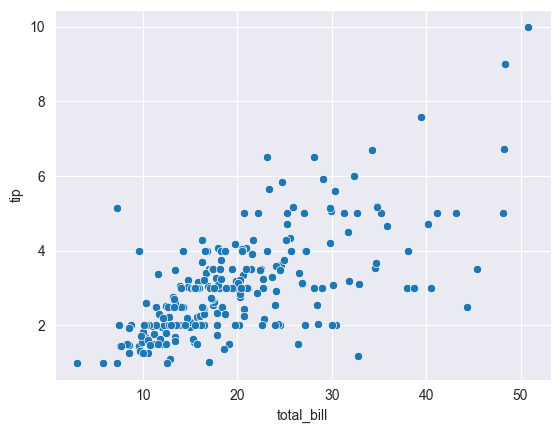

In [4]:
sns.scatterplot(data=tips, x='total_bill',y='tip')
# generally scatter plot is plotted for numerical columns, but we can also plot it between one numerical and one categorical column .

<Axes: xlabel='day', ylabel='total_bill'>

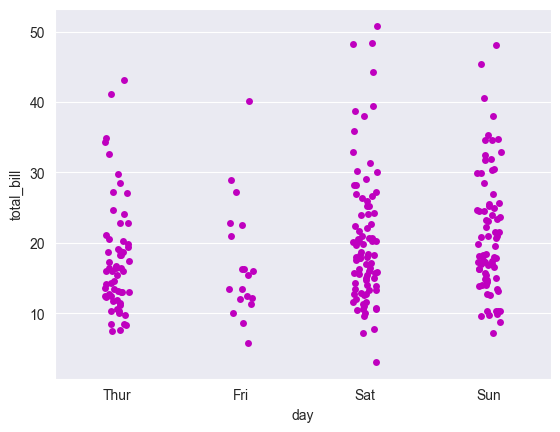

In [12]:
# strip plot
# axes level function
sns.stripplot(data=tips,x='day',y='total_bill' , color = 'm' )
# these points were supposed to be in a straight line but seaborn internally adds some noise to improve readability , we can stop this behaviour by using jitter = False
# sns.stripplot(data=tips,x='day',y='total_bill' , jitter=False)

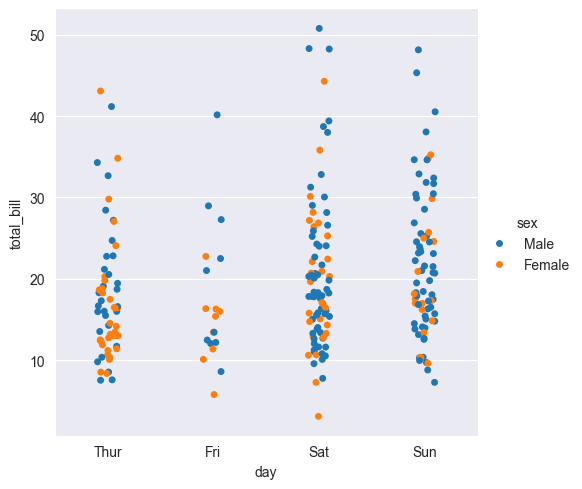

In [24]:
# using catplot
# figure level function
sns.catplot(data=tips, x='day',y='total_bill',kind='strip' , hue = 'sex')

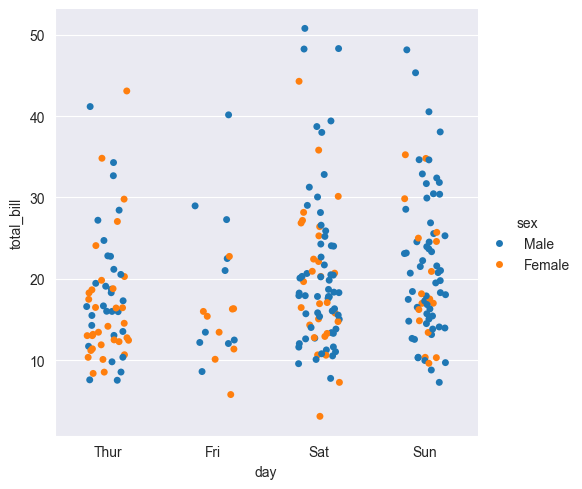

In [23]:
# jitter : used to increase noise (disperse the points) .
sns.catplot(data=tips, x='day',y='total_bill',kind='strip',jitter=0.2,hue='sex')

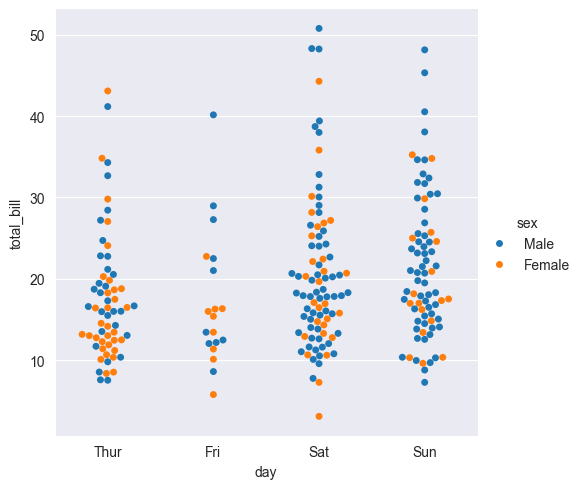

In [29]:
# swarmplot
sns.catplot(data=tips, x='day',y='total_bill',kind='swarm' , hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

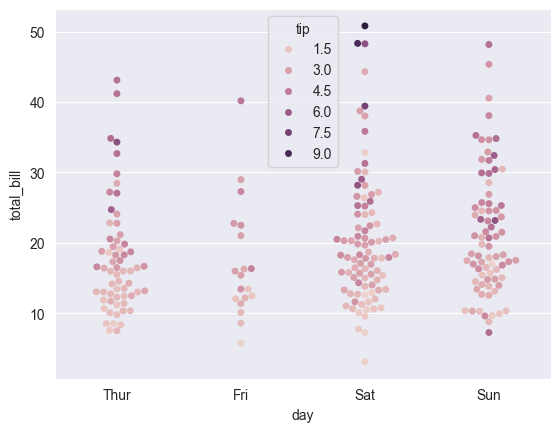

In [30]:
# axis level function
sns.swarmplot(data=tips, x='day',y='total_bill' , hue='tip')

<Axes: xlabel='day', ylabel='total_bill'>

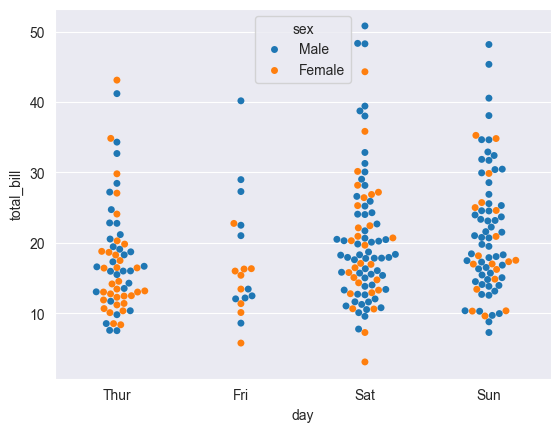

In [31]:
# hue
sns.swarmplot(data=tips, x='day',y='total_bill',hue='sex')

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

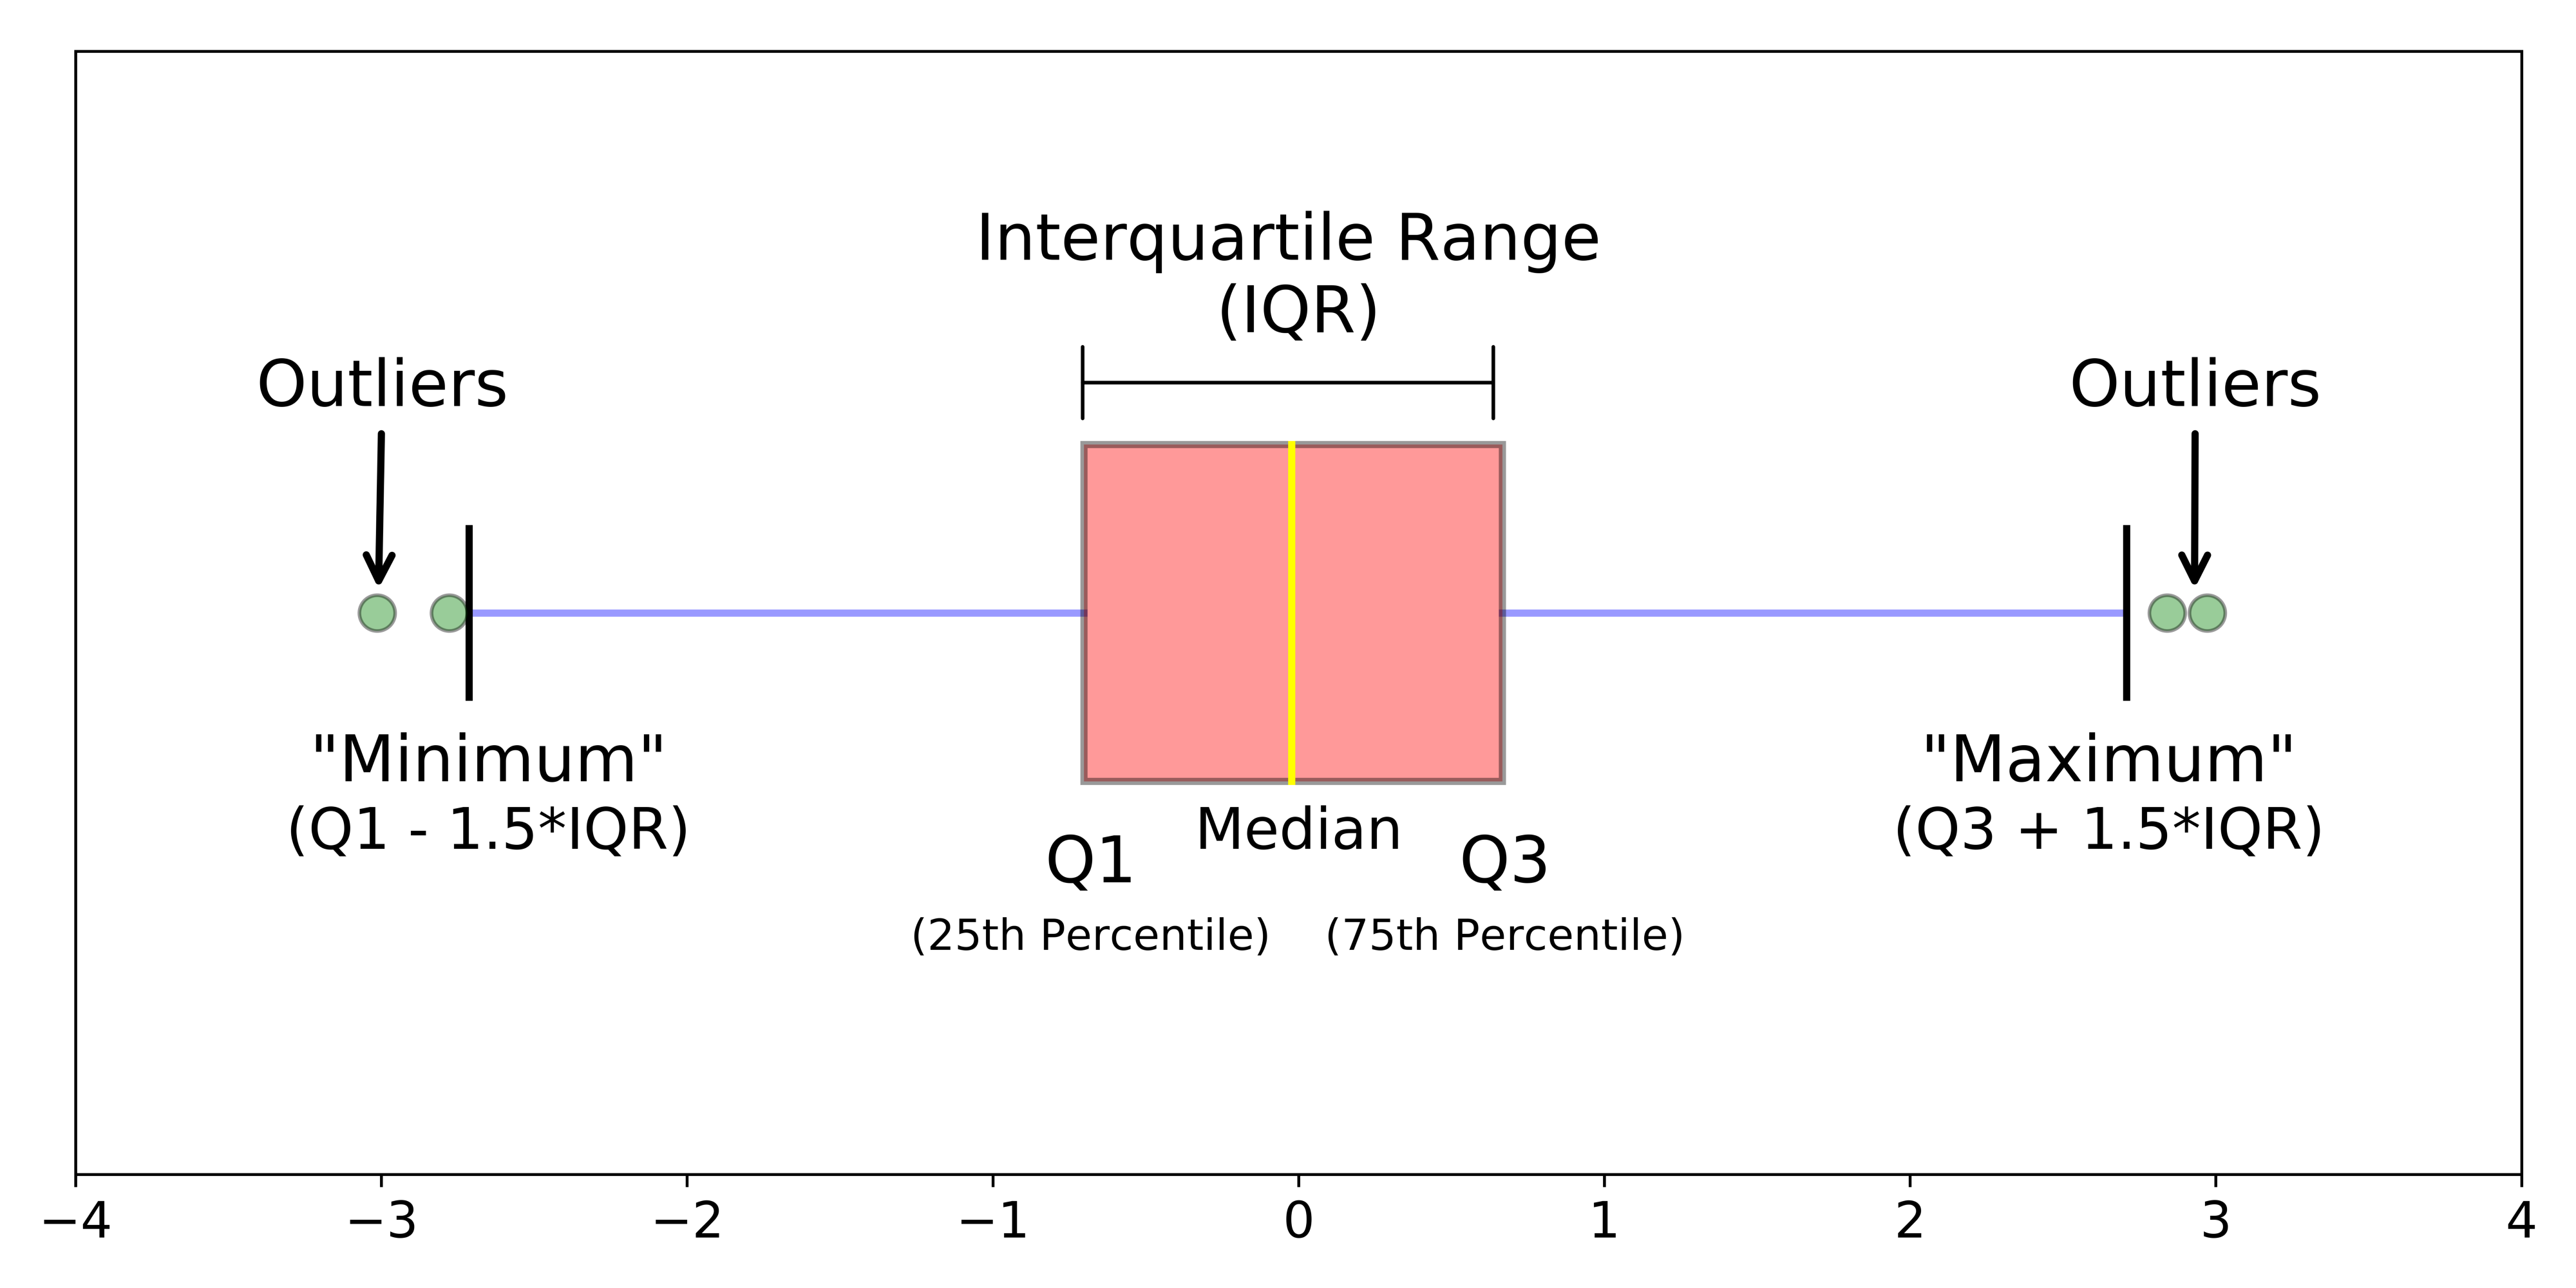

<Axes: xlabel='day', ylabel='total_bill'>

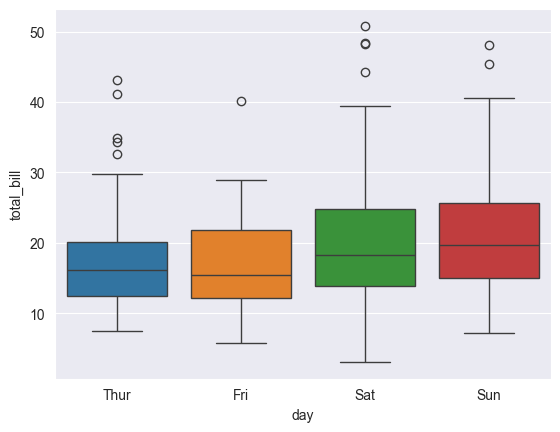

In [33]:
# Box plot : axis level function
sns.boxplot(data=tips,x='day',y='total_bill' , hue='day')

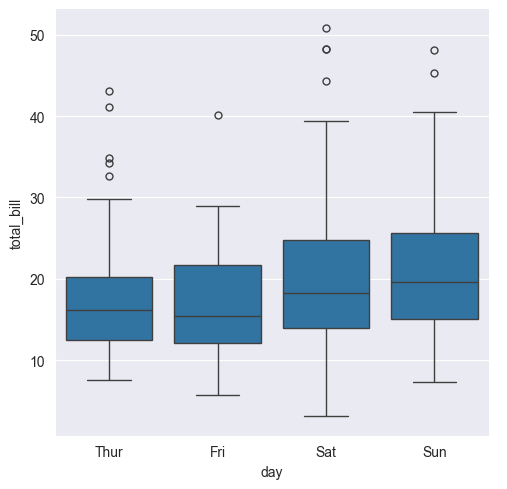

In [36]:
# Using catplot
sns.catplot(data=tips,x='day',y='total_bill',kind='box')

<Axes: xlabel='day', ylabel='total_bill'>

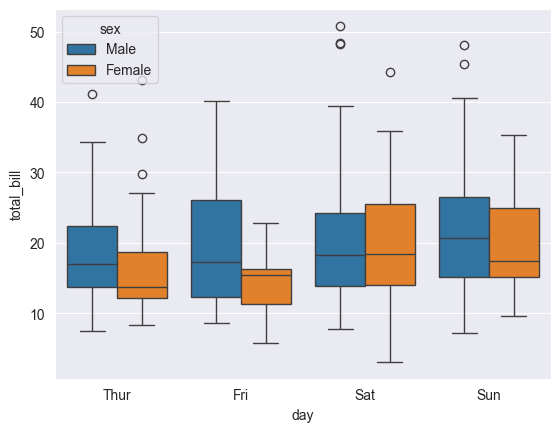

In [37]:
# hue
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')

<Axes: ylabel='total_bill'>

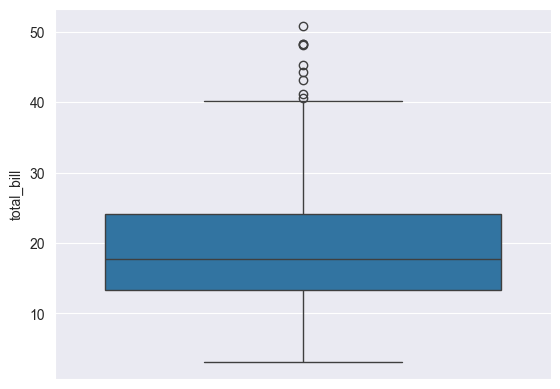

In [39]:
# single boxplot -> numerical col
sns.boxplot(data=tips,y='total_bill')

### Violinplot = (Boxplot + KDEplot)

<Axes: xlabel='day', ylabel='total_bill'>

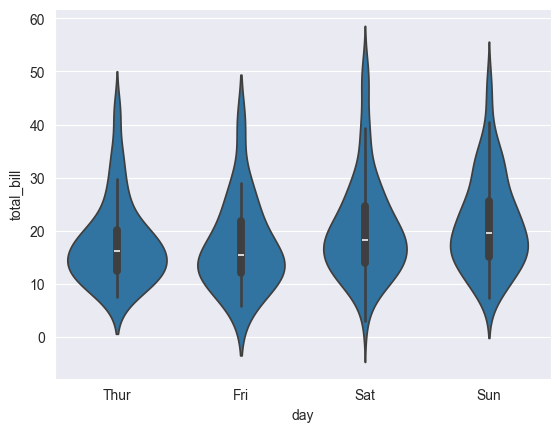

In [41]:
# violinplot
sns.violinplot(data=tips,x='day',y='total_bill')

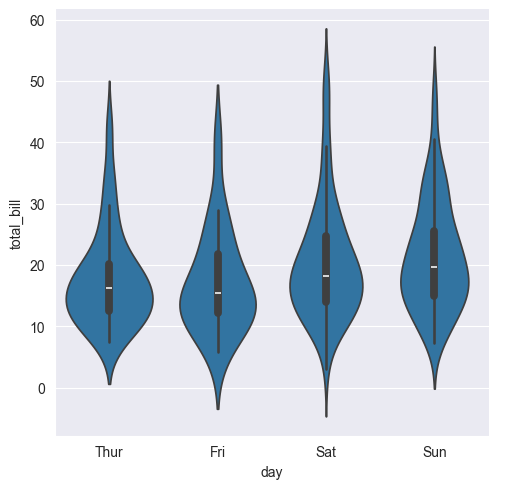

In [42]:
sns.catplot(data=tips,x='day',y='total_bill',kind='violin')

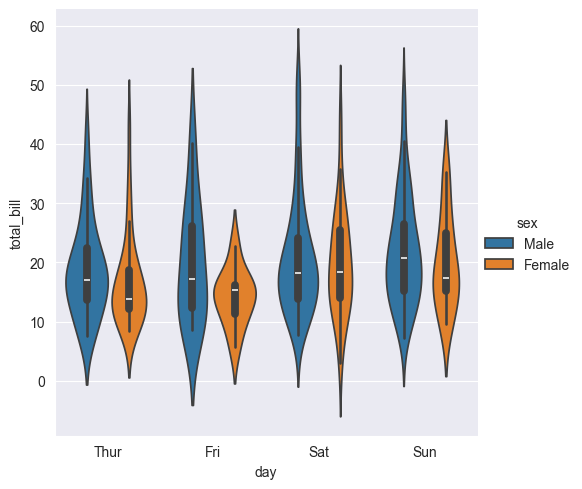

In [47]:
# hue
sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex')
# can use split = true to join both the sex violin plots of a day
# sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex',split=True)

<Axes: xlabel='sex', ylabel='total_bill'>

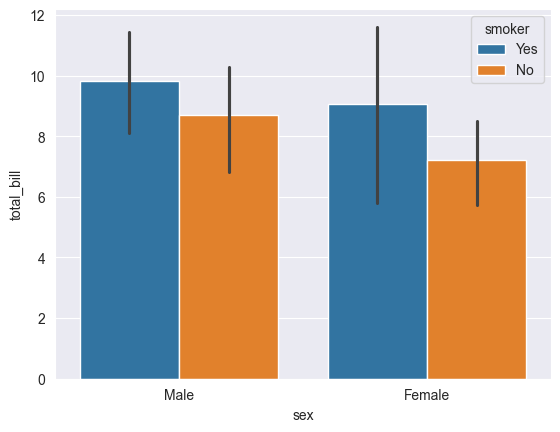

In [56]:
# barplot
import numpy as np
sns.barplot(data=tips, x='sex', y='total_bill',hue='smoker',estimator=np.std)
# Default value of estimator is mean

<Axes: xlabel='sex', ylabel='total_bill'>

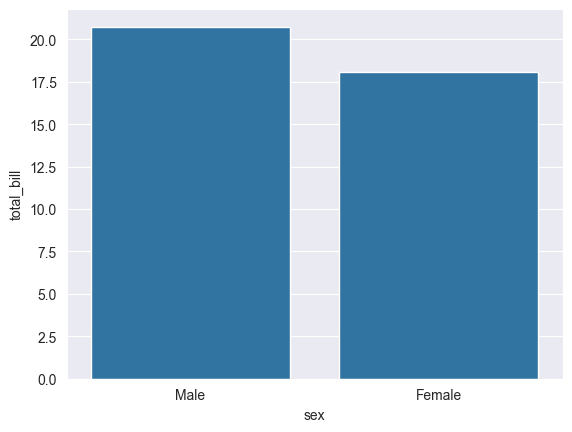

In [52]:
sns.barplot(data=tips, x='sex', y='total_bill',errorbar=None)

<Axes: xlabel='sex', ylabel='total_bill'>

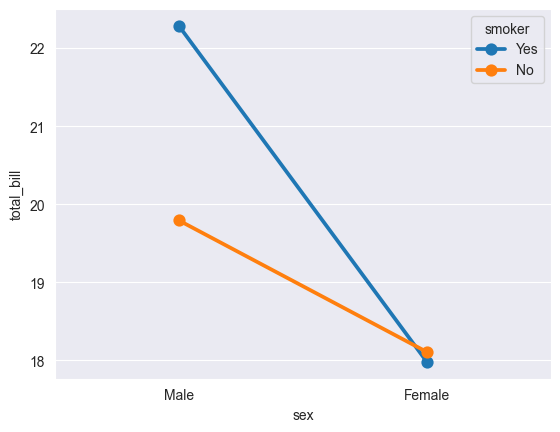

In [58]:
# point plot
sns.pointplot(data=tips, x='sex', y='total_bill',hue='smoker', errorbar=None)

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

<Axes: xlabel='sex', ylabel='count'>

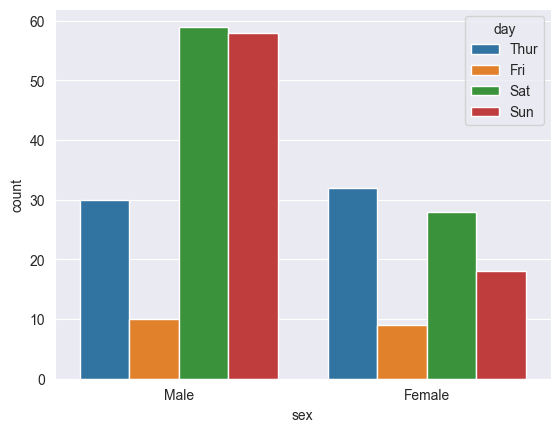

In [59]:
# countplot
sns.countplot(data=tips,x='sex',hue='day')

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

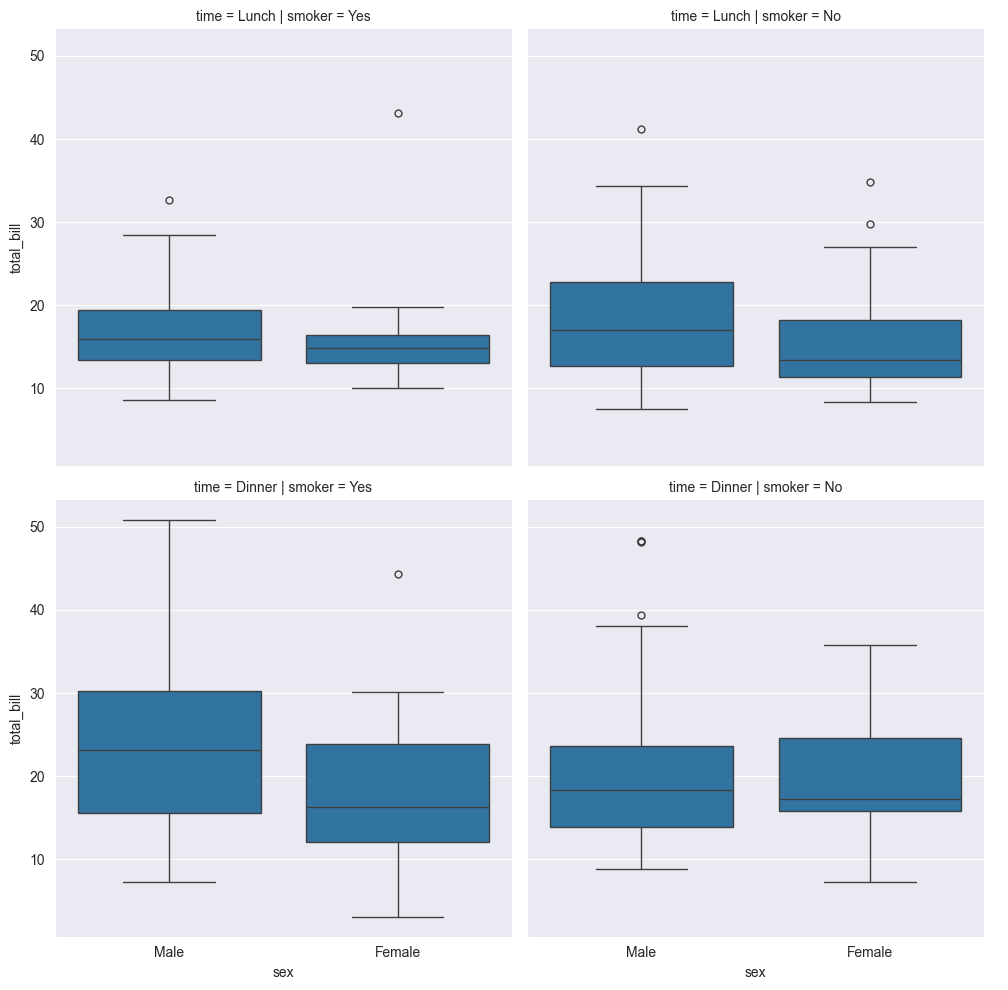

In [63]:
# faceting using catplot
sns.catplot(data=tips, x='sex',y='total_bill',col='smoker',kind='box',row='time')

### Regression Plots

- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<Axes: xlabel='total_bill', ylabel='tip'>

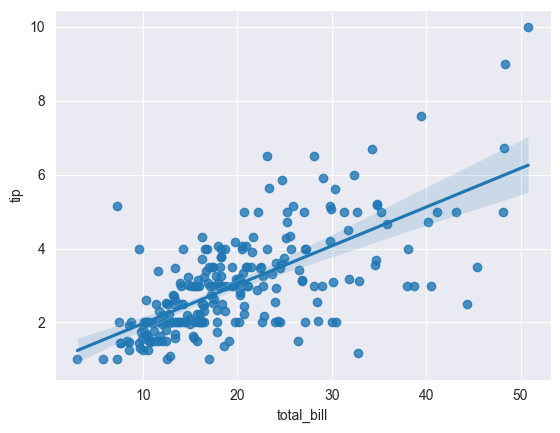

In [65]:
# axes level
# hue parameter is not available
sns.regplot(data=tips,x='total_bill',y='tip' )

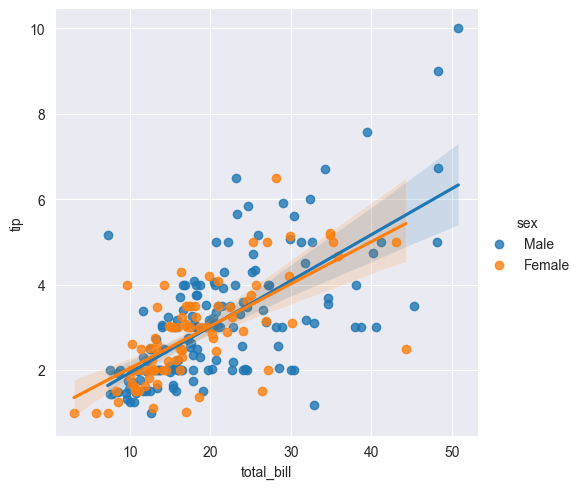

In [66]:
# figure level function
sns.lmplot(data=tips,x='total_bill',y='tip',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

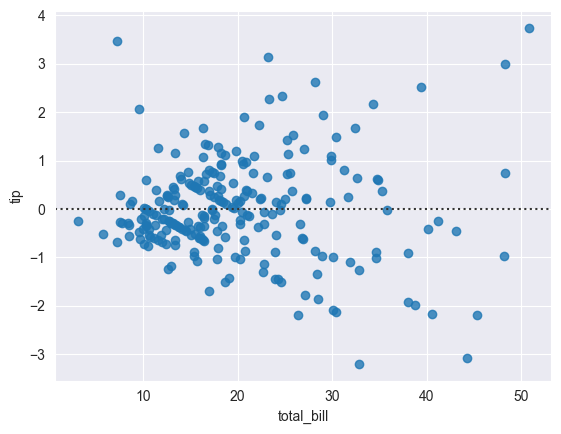

In [69]:
# residplot
# the difference between predicted and actual value is known as residual .
# Structure in the residual plot can reveal a violation of linear regression assumptions
sns.residplot(data=tips,x='total_bill',y='tip')

### A second way to plot Facet plots -> FacetGrid

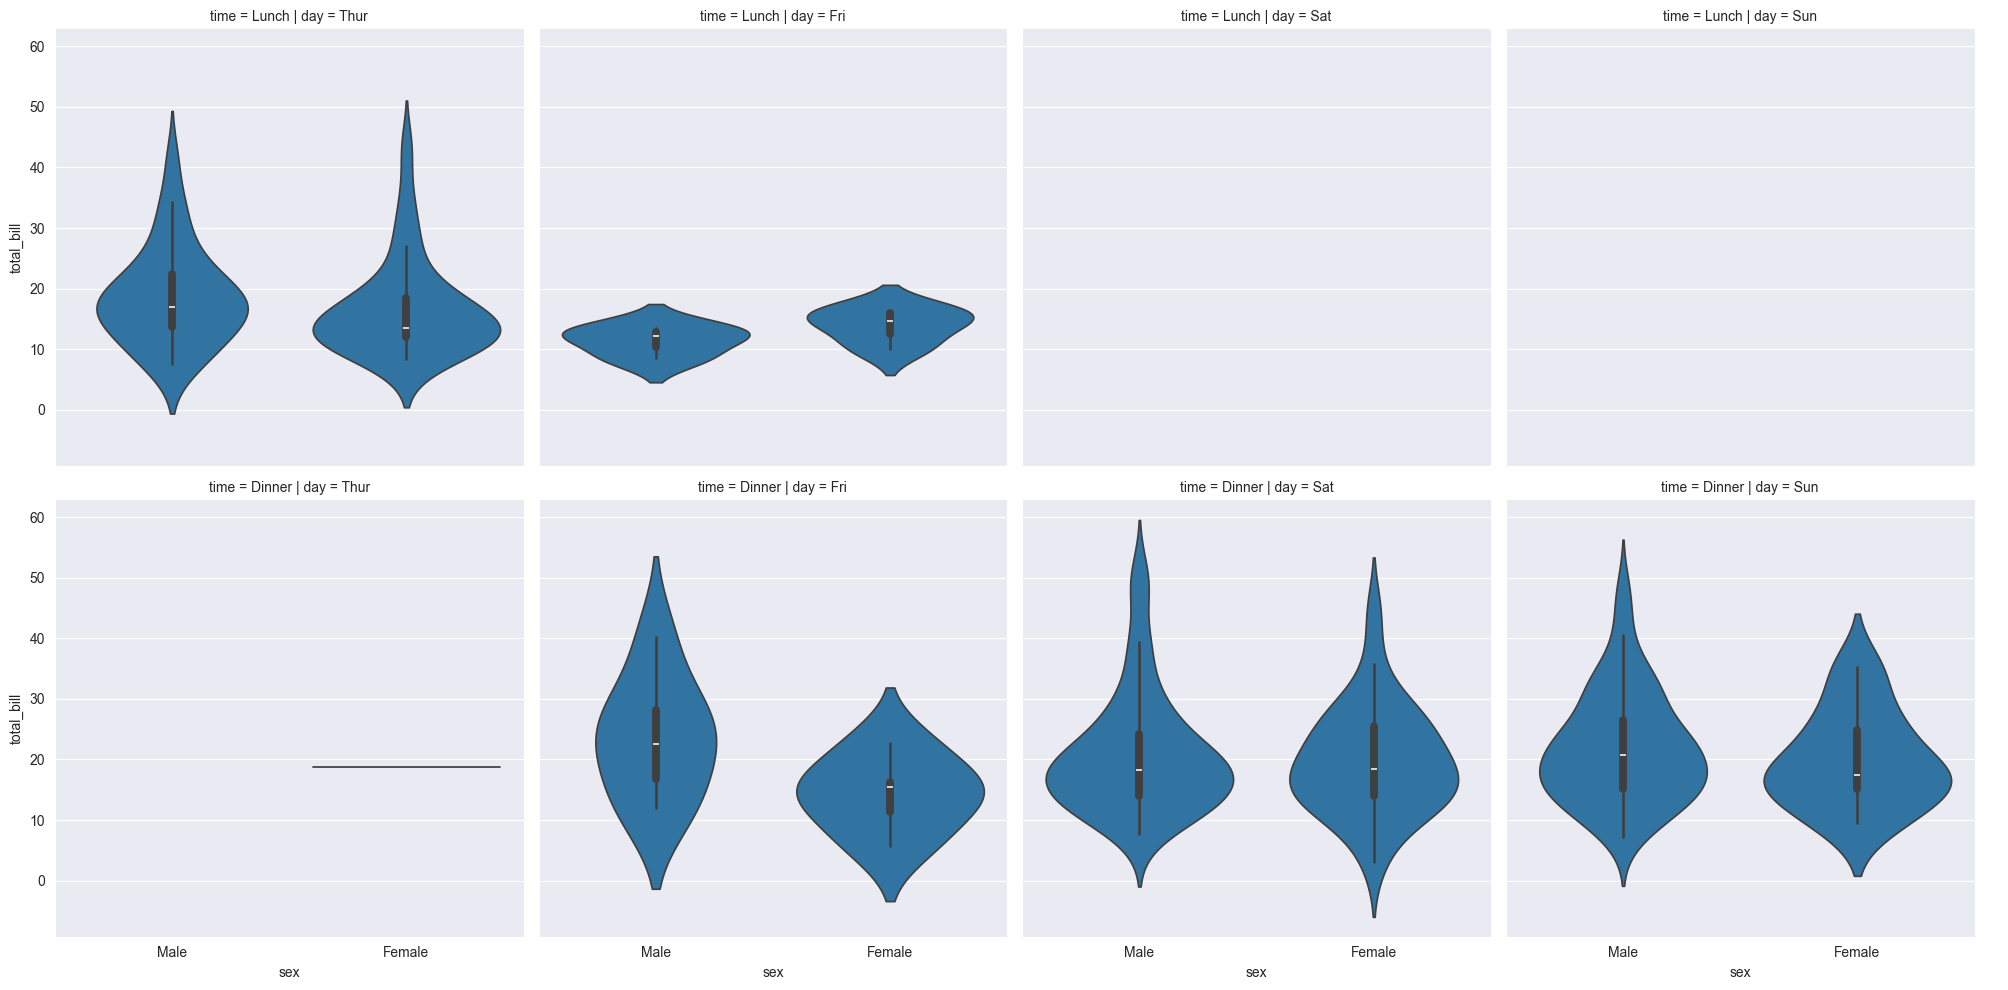

In [70]:
# figure level -> relplot -> displot -> catplot -> lmplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

C:\Users\RITESH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


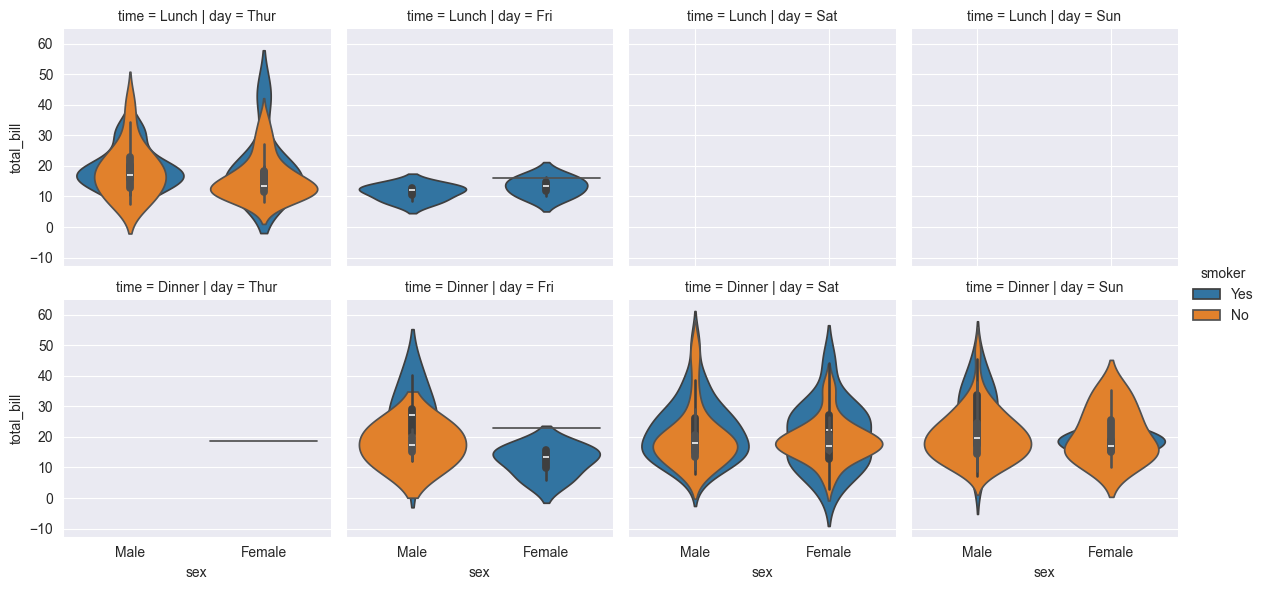

In [76]:
g = sns.FacetGrid(data=tips,col='day',row='time',hue='smoker')
g.map(sns.violinplot,'sex','total_bill')
g.add_legend()

### Plotting Pairwise Relationship (PairGrid Vs Pairplot)

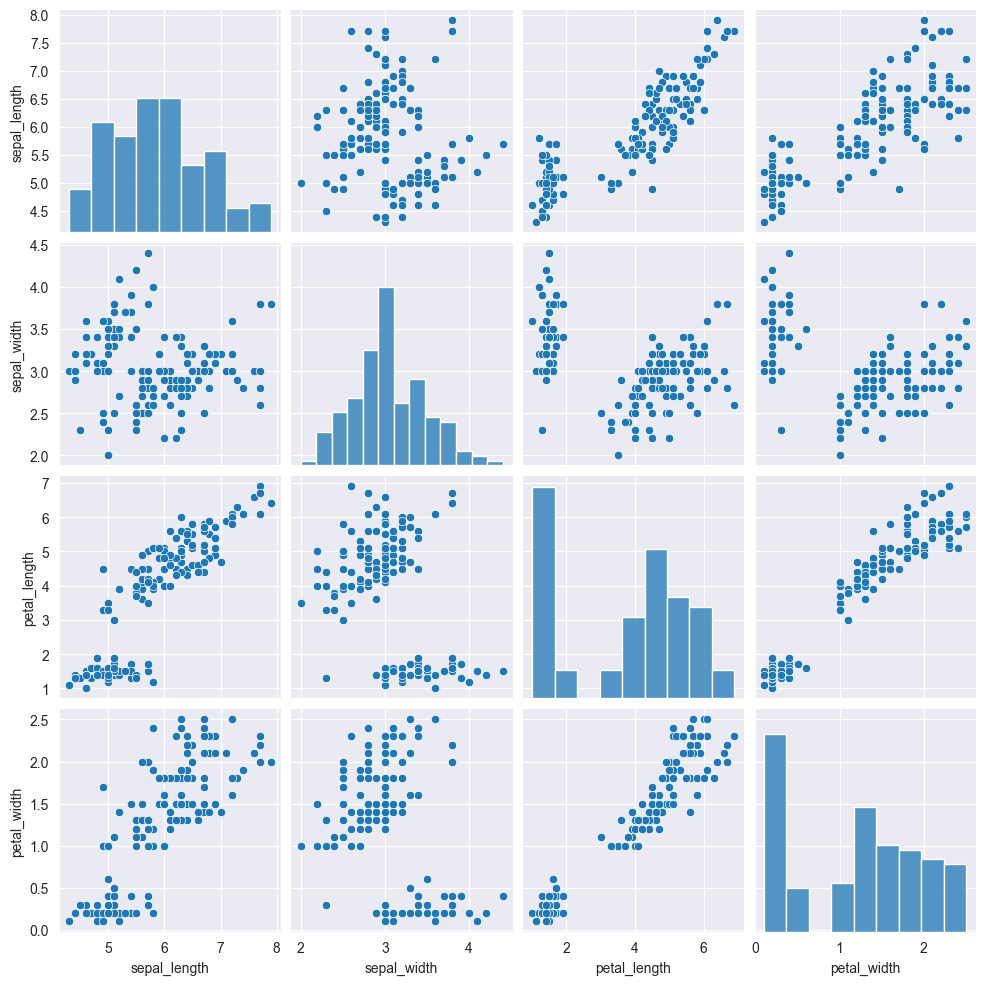

In [78]:
sns.pairplot(iris)

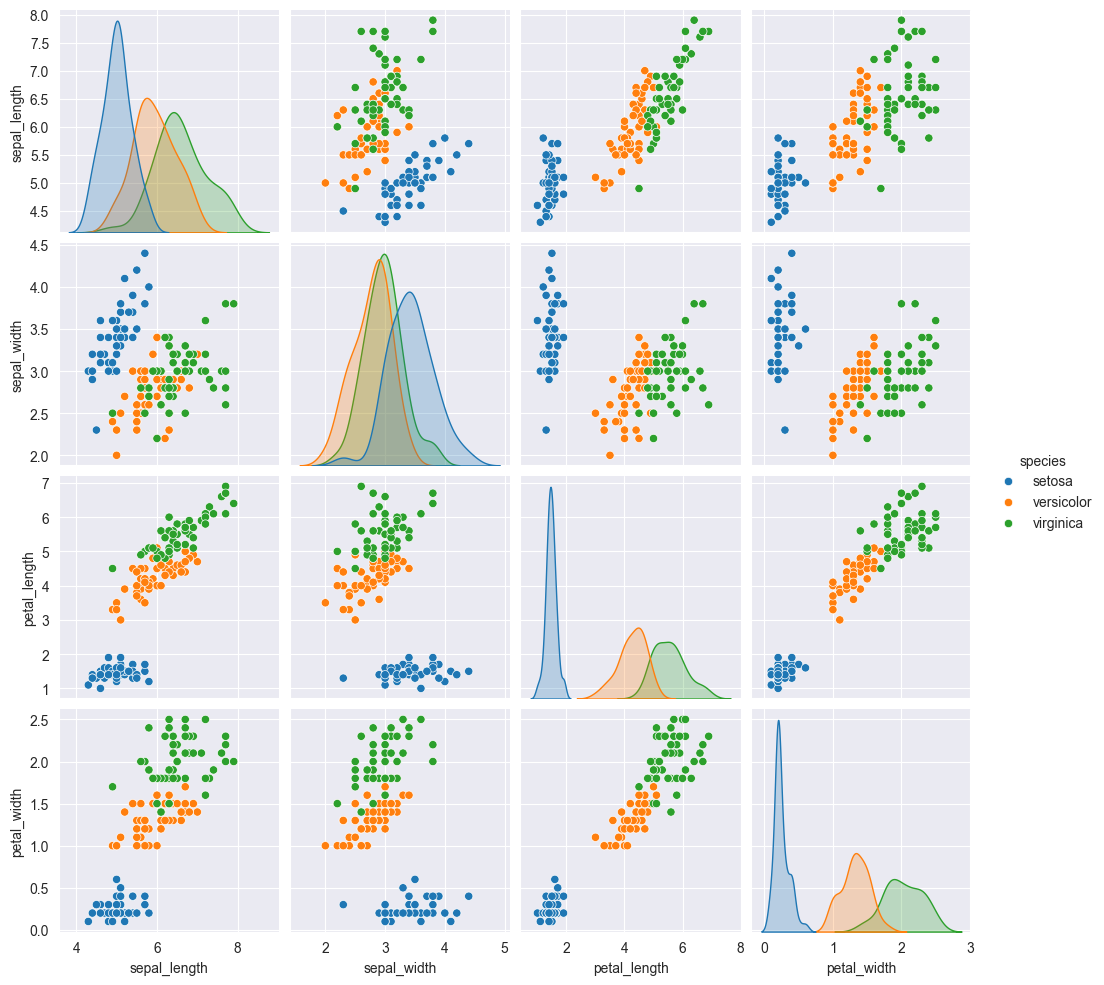

In [79]:
sns.pairplot(iris,hue='species')

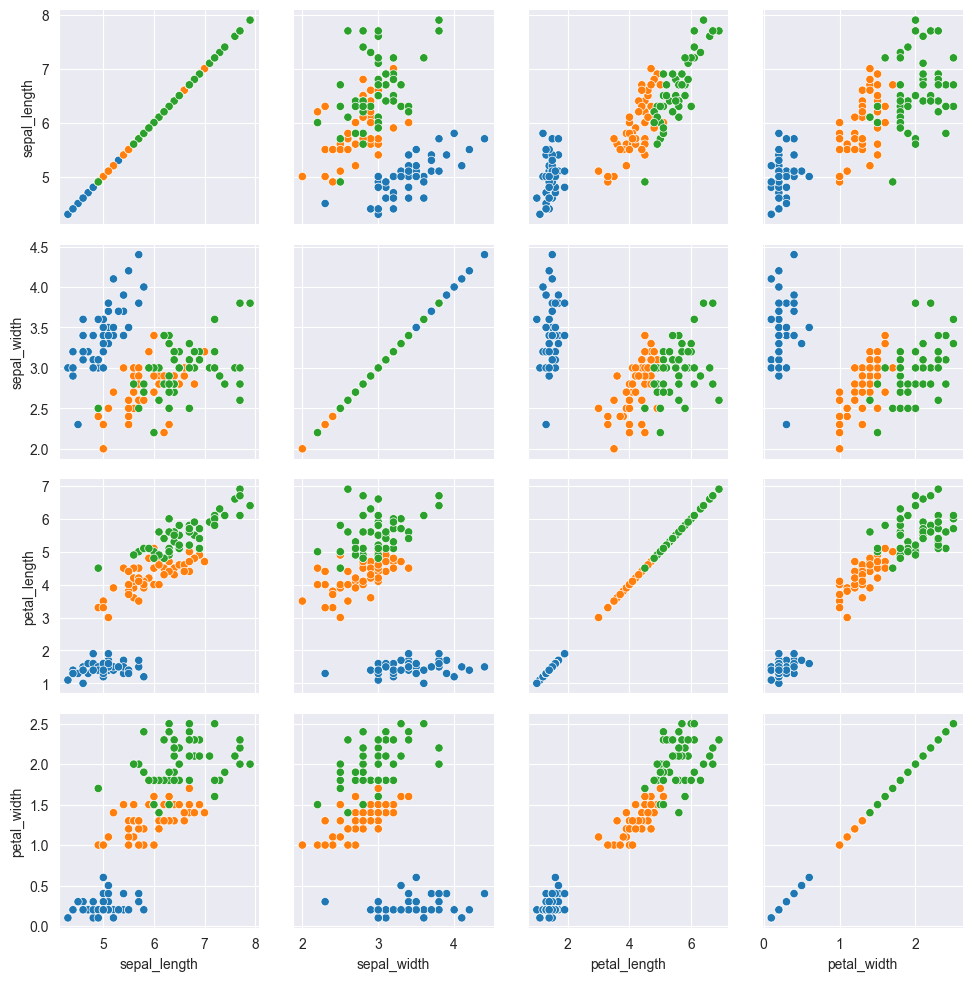

In [80]:
# pair grid
g = sns.PairGrid(data=iris,hue='species')
# g.map
g.map(sns.scatterplot)

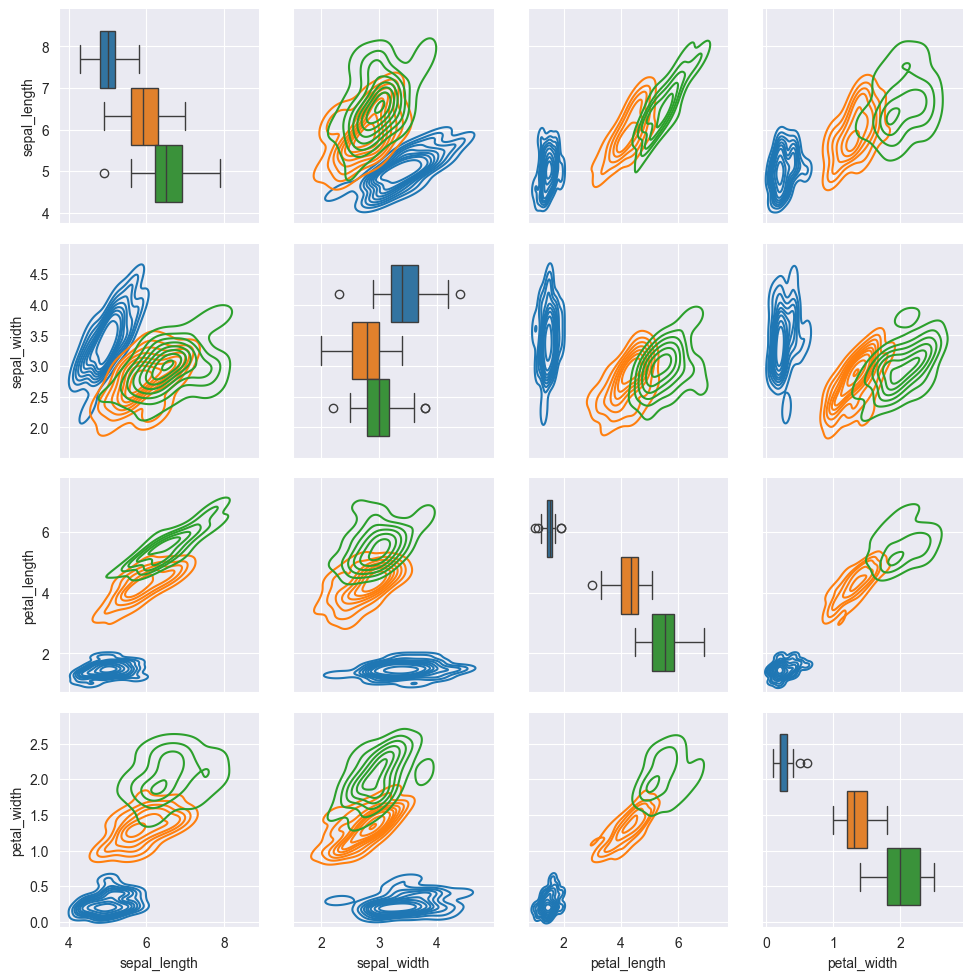

In [81]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.kdeplot)

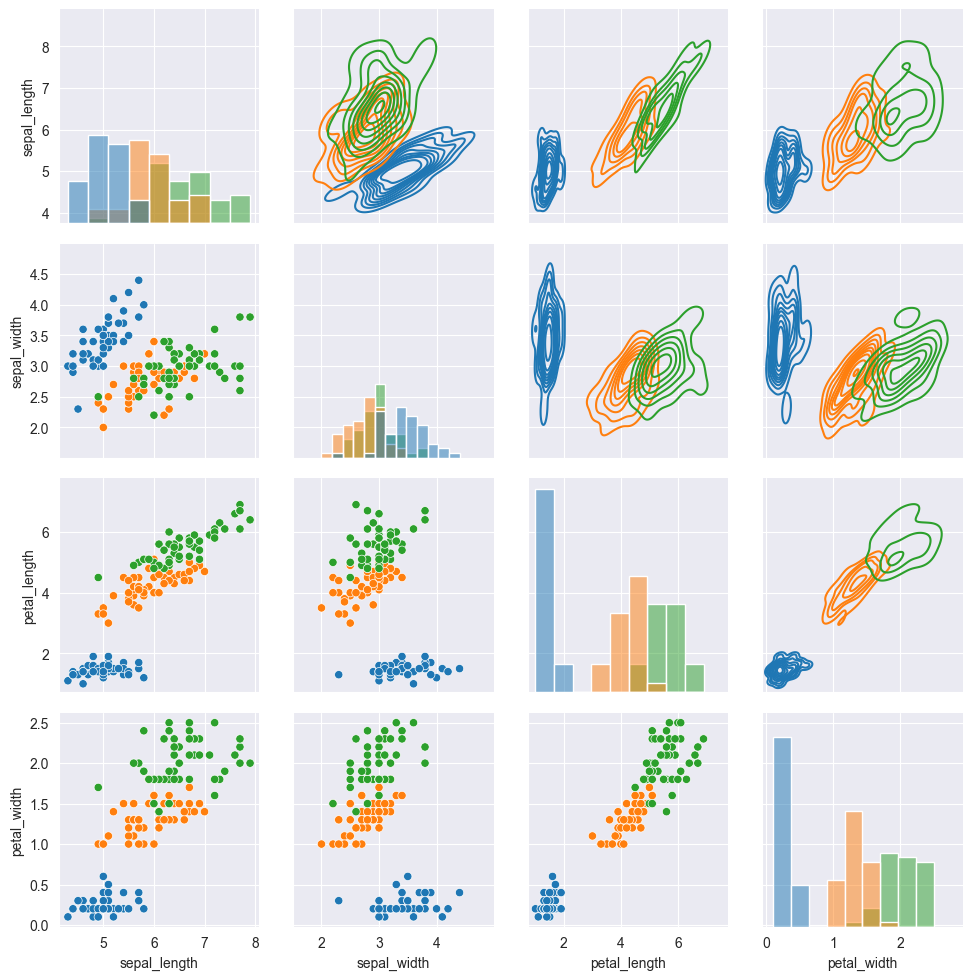

In [82]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

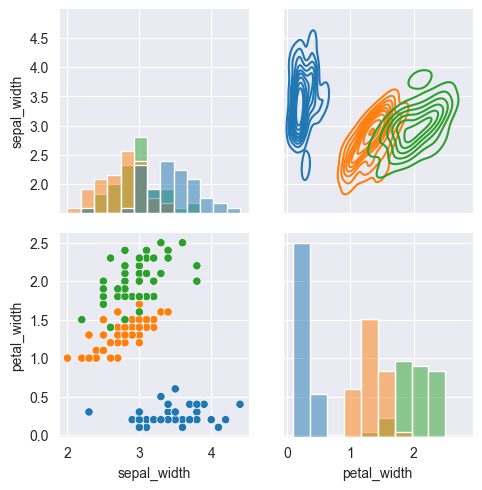

In [84]:
# vars : can restrict the number of columns
g = sns.PairGrid(data=iris,hue='species',vars=['sepal_width','petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

### JointGrid Vs Jointplot

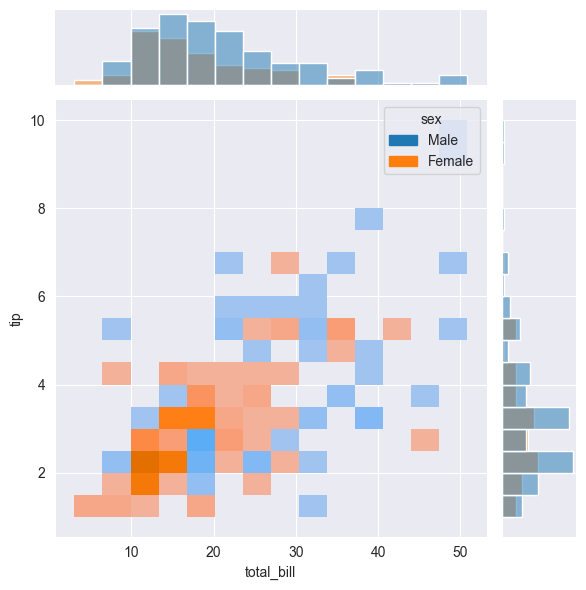

In [85]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='hist',hue='sex')

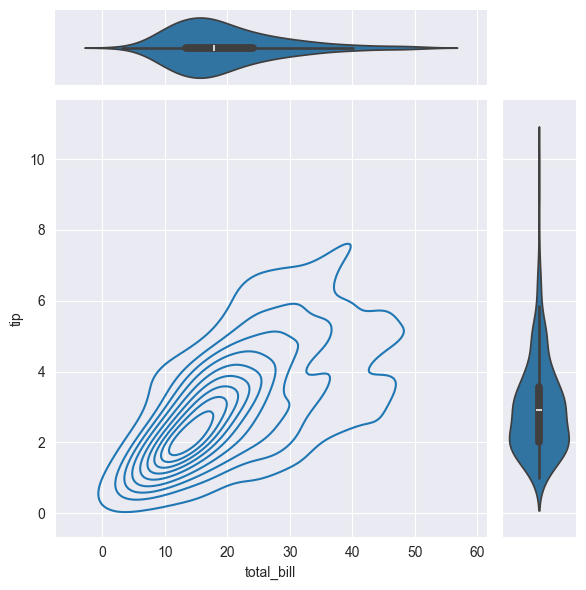

In [86]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.kdeplot,sns.violinplot)

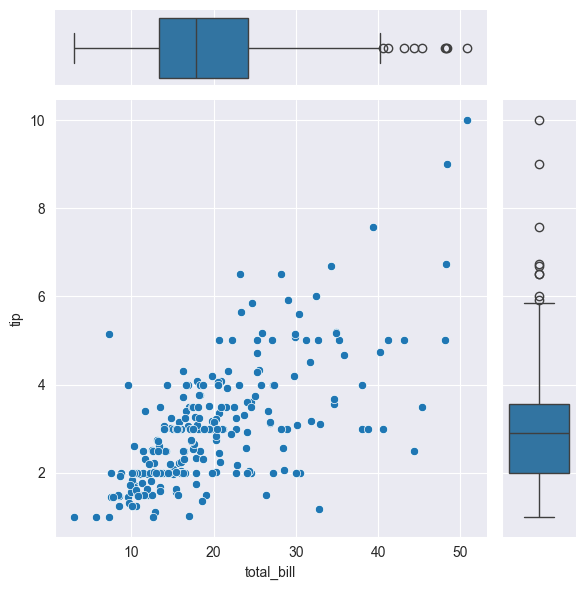

In [88]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.boxplot)

### Utility Functions

In [92]:
# get dataset names
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [93]:
# load dataset
sns.load_dataset('planets')

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
